<a href="https://colab.research.google.com/github/BhaveshNikam09/Deep_learning_practise/blob/main/loss_and_activations_fucntions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loss** **Function**

In [52]:
import tensorflow as tf
import torch
import torch.nn as nn

**1.Mean Squared Error (MSE):**


*   Penalizes larger errors more due to squaring.
*   Sensitive to outliers.



In [53]:
## using tensorflow
y_true=tf.constant([3.0,5.0,7.0])
y_pred=tf.constant([2.5,5.2,6.8])
mse=tf.keras.losses.MeanSquaredError()
loss=mse(y_true,y_pred)
print(f'Means Squared Error {loss}')

Means Squared Error 0.10999995470046997


In [54]:
## using pytorch
y_true=torch.tensor([3.0,5.0,7.0])
y_pred=torch.tensor([2.5,5.2,6.8])
mse=nn.MSELoss()
loss=mse(y_true,y_pred)
print(f'mse using the pytorch {loss}')

mse using the pytorch 0.10999995470046997


**2.Mean Absolute Error (MAE):**


*  Less sensitive to outliers than MSE.


*   Measures absolute differences.




In [55]:
## using tensorflow
mae=tf.keras.losses.MeanAbsoluteError()
loss=mae(y_true,y_pred)
print(f'Mean Absolute Error {loss}')

Mean Absolute Error 0.299999862909317


In [56]:
##using pytorch
maee=nn.L1Loss()
loss=maee(y_true,y_pred)
print(f'mae using the pytorch {loss}')

mae using the pytorch 0.299999862909317


**2. Loss Functions for Classification**:
   
   **(a) Binary Crossentropy (for Binary Classification)**



*  Used when labels are 0 or 1.



In [57]:
## for classification using tensorflow
y_true = tf.constant([1.0, 0.0, 1.0])
y_pred = tf.constant([0.9, 0.2, 0.8])
bce=tf.keras.losses.BinaryCrossentropy()
loss=bce(y_true,y_pred)
print(f'Binary Cross Entropy {loss.numpy()}')

Binary Cross Entropy 0.18388253450393677


In [58]:
## using the pytorch
y_true = torch.tensor([1.0, 0.0, 1.0])
y_pred = torch.tensor([0.9, 0.2, 0.8])
bce=nn.BCELoss()
loss1=bce(y_pred,y_true)
print(f'Binary Cross Entropy  using pytorch {loss1}')

Binary Cross Entropy  using pytorch 0.18388254940509796


**(b) Categorical Crossentropy (for Multi-Class Classification)**


*   Used when labels belong to multiple categories



In [59]:
# using tensorlfow
y_true = tf.constant([[0, 1, 0], [1, 0, 0]])  # One-hot encoded labels
y_pred = tf.constant([[0.2, 0.7, 0.1], [0.9, 0.05, 0.05]])  # Model predictions

cce = tf.keras.losses.CategoricalCrossentropy()
loss = cce(y_true, y_pred)
print("Categorical Crossentropy Loss:", loss.numpy())


Categorical Crossentropy Loss: 0.23101775


In [60]:
# Using pytorch
y_true = torch.tensor([1, 0])  # Class indices
y_pred = torch.tensor([[0.2, 0.7, 0.1], [0.9, 0.05, 0.05]])

cce = nn.CrossEntropyLoss()
loss = cce(y_pred, y_true)
print("Categorical Crossentropy Loss:", loss.item())


Categorical Crossentropy Loss: 0.6928712129592896




*   **MSE: Good for regression but sensitive to outliers.**

*   **MAE: Less sensitive to outliers**

*   **Binary Crossentropy: Used for binary classification.**

*   **Categorical Crossentropy: Used for multi-class classification.**



# **Activation** **Functions**



**1. Linear Activation Funtion :**

🔹Used in: Regression problems (output layer).

🔹 Limitation: Cannot capture complex patterns.

In [34]:
linear=tf.keras.activations.linear
print(linear(2.5))

2.5


**2.Sigmoid Function (Logistic Function):**

🔹 Range: (0,1)

🔹 Used in: Binary classification (output layer).

🔹 Limitations:
✅ Good for probabilities.

❌ Can cause vanishing gradients for large/small values.

In [35]:
sigmoid = tf.keras.activations.sigmoid  ## using the tensor
print(sigmoid(tf.constant([-1.0, 0.0, 1.0])))  # Outputs values between 0 and 1

tf.Tensor([0.26894143 0.5        0.7310586 ], shape=(3,), dtype=float32)


In [36]:
import torch.nn.functional as F ## using the pytorch
import torch
print(F.sigmoid(torch.tensor([-1.0, 0.0, 1.0])))  # Outputs values between 0 and 1

tensor([0.2689, 0.5000, 0.7311])


**3.Tanh (Hyperbolic Tangent):**

🔹 Range: (-1,1)

🔹 Used in: Hidden layers of RNNs.

🔹 Advantage: Zero-centered (better than sigmoid).

🔹 Disadvantage: Still suffers from vanishing gradients.


In [37]:
tanh = tf.keras.activations.tanh
print(tanh(tf.constant([-1.0, 0.0, 1.0])))  # Outputs values between -1 and 1

tf.Tensor([-0.7615942  0.         0.7615942], shape=(3,), dtype=float32)


In [39]:
## using the pytorch
print(F.tanh(torch.tensor([-1.0, 0.0, 1.0])))  # Outputs values between -1 and 1

tensor([-0.7616,  0.0000,  0.7616])


**4.ReLU (Rectified Linear Unit):**

🔹 Range:  (0,infinity)

🔹 Used in: Most hidden layers in CNNs and deep networks.

🔹 Advantage: Solves vanishing gradient problem.

🔹 Disadvantage: Dying ReLU problem (neurons can get stuck at zero).

In [40]:
relu = tf.keras.activations.relu
print(relu(tf.constant([-1.0, 0.0, 1.0])))  # Outputs [0, 0, 1]

tf.Tensor([0. 0. 1.], shape=(3,), dtype=float32)


In [41]:
print(F.relu(torch.tensor([-1.0, 0.0, 1.0])))  # Outputs [0, 0, 1]

tensor([0., 0., 1.])


**5.Leaky Relu:**

🔹 Fixes Dying ReLU by allowing a small negative slope.

In [42]:
leaky_relu = tf.keras.layers.LeakyReLU(alpha=0.01)
print(leaky_relu(tf.constant([-1.0, 0.0, 1.0])))  # Outputs small negative values for x < 0

tf.Tensor([-0.01  0.    1.  ], shape=(3,), dtype=float32)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [43]:
leaky_relu = torch.nn.LeakyReLU(0.01)
print(leaky_relu(torch.tensor([-1.0, 0.0, 1.0])))

tensor([-0.0100,  0.0000,  1.0000])


**6.Softmax (Multi-Class Classification):**

🔹 Used in: Last layer for multi-class classification.

🔹 Converts logits into probability distributions.

In [45]:
softmax = tf.keras.activations.softmax
print(softmax(tf.constant([2.0, 1.0, 0.1])))  # Outputs probabilities summing to 1

tf.Tensor([0.6590012  0.24243298 0.09856589], shape=(3,), dtype=float32)


In [46]:
print(F.softmax(torch.tensor([2.0, 1.0, 0.1]), dim=0))  # Outputs probabilities summing to 1

tensor([0.6590, 0.2424, 0.0986])


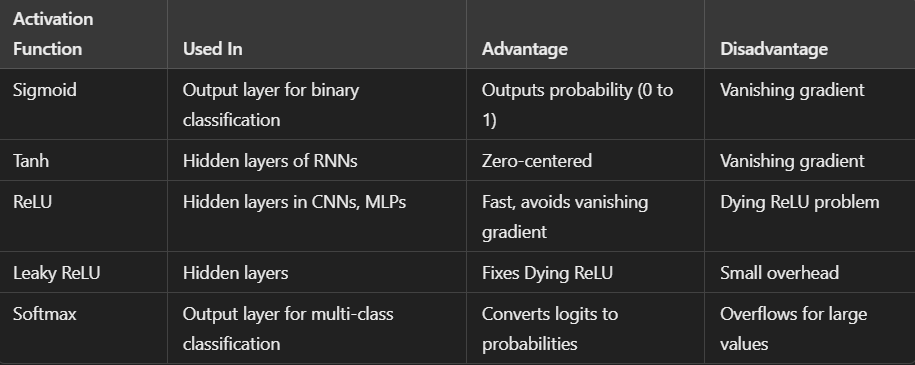